---
<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 사이킷런을 사용한 당뇨병 혈당 예측
  </h2>
</div>

<img src = "https://res.cloudinary.com/grohealth/image/upload/$wpsize_!_cld_full!,w_1200,h_630,c_scale/v1588094388/How-to-Bring-Down-High-Blood-Sugar-Levels-1.png" width = "700" >


이번 실습 시간에 다뤄볼 데이터는 당뇨병 관련 데이터 입니다.

- 당뇨병에 영향을 끼치는 여러 요소들 (X, Features)
- 혈당 (Y, Target)


In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [4]:
import pandas as pd
diabetes_df = pd.DataFrame(diabetes.data, 
                         columns=diabetes.feature_names, 
                         index=range(1,len(diabetes.data)+1))
diabetes_df['Target'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
1,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
2,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
3,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
4,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
5,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## X, y 설정 

In [18]:
X = pd.DataFrame(diabetes_df['bmi']) 
y = diabetes_df['Target']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test =  train_test_split(X,y,random_state=42)

In [22]:
# 1. 선형회귀 
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

## 7차 다항회귀 
```python 
from sklearn.preprocessing import PolynomialFeatures

``` 

In [32]:
# 모델링 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=7)

# train, test --> 7차 다항식으로 변경 
X_train_7 = poly.fit_transform(X_train)
X_test_7 = poly.fit_transform(X_test)

lin_model_7 = LinearRegression()
lin_model_7.fit(X_train_7, y_train)
y_pred_7 = lin_model_7.predict(X_test_7)

# 평가 

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np 

def pprint(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mse)

    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')

In [34]:
print('단순선형회귀')
pprint(y_test, y_pred)
print('-'*40)
print('7차 다항회귀')
pprint(y_test, y_pred_7)

단순선형회귀
MAE: 49.80505217504619
MSE: 3775.6172015007783
RMSE: 61.44605114652022
----------------------------------------
7차 다항회귀
MAE: 49.78469740641727
MSE: 3871.1351751192556
RMSE: 62.218447225234215


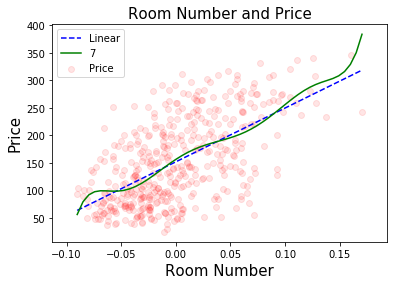

In [35]:
import matplotlib.pyplot as plt

xx = np.linspace(X['bmi'].min(),X['bmi'].max())[:,np.newaxis]
xx2 = poly.fit_transform(xx)

yy1 = lin_model.predict(xx)
yy2 = lin_model_7.predict(xx2)


plt.scatter(X,y,color='red',alpha=0.1,label = 'Price')
plt.plot(xx,yy1,color='blue',linestyle='--',label='Linear') # 1차식을 그릴거니까
plt.plot(xx,yy2,color='green',linestyle='-',label='7') # 7차 다항회귀 


plt.title("Room Number and Price",fontsize=15)
plt.xlabel('Room Number',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.legend(fontsize=10)
plt.show()